# Mini Project: Titanic Dataset

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load Data

In [137]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# checking Data Types...

In [138]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

> the are few (object) category in this dataset, let's fix them

In [139]:
{col: df[col].nunique() for col in df if df[col].dtype == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [140]:
df = df.astype({
    'sex': 'category',
    'embarked': 'category',
    'who': 'category',
    'embark_town': 'category',
    'alive': 'category'
})

> converting 'age' and 'alive' to Zero/One 

In [141]:
df.alive = df.alive.cat.codes
df.sex = df.sex.cat.codes

In [142]:
df[['sex', 'alive']]

,sex,alive
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,0
889,1,1


# Check Correlations 

In [143]:
df.corr().style.background_gradient(cmap='Greens')

/tmp/ipykernel_54/661474753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='Greens')


,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


#### let's dig into more details

In [144]:
df.corr()[['survived']].style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_54/2996785553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['survived']].style.background_gradient(cmap='coolwarm')


,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


> survived and alive both represent the same information, let's drop alive from dataset

In [145]:
df.drop(columns='alive', inplace=True)

In [146]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


In [147]:
df.describe(include='category')

,embarked,class,who,deck,embark_town
count,889,891,891,203,889
unique,3,3,3,7,3
top,S,Third,man,C,Southampton
freq,644,491,537,59,644


In [148]:
(df.embark_town.str.get(0) == df.embarked).sum() / df.shape[0]

0.9977553310886644

> it's obvious that these two featurs also have the same representation

In [149]:
df.drop(columns='embark_town', inplace=True)

In [150]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,True


# Missing Values

In [151]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck          688
alone           0
dtype: int64

> missing values for age and deck are too high!

In [152]:
import missingno as msno
%matplotlib inline

<AxesSubplot: >

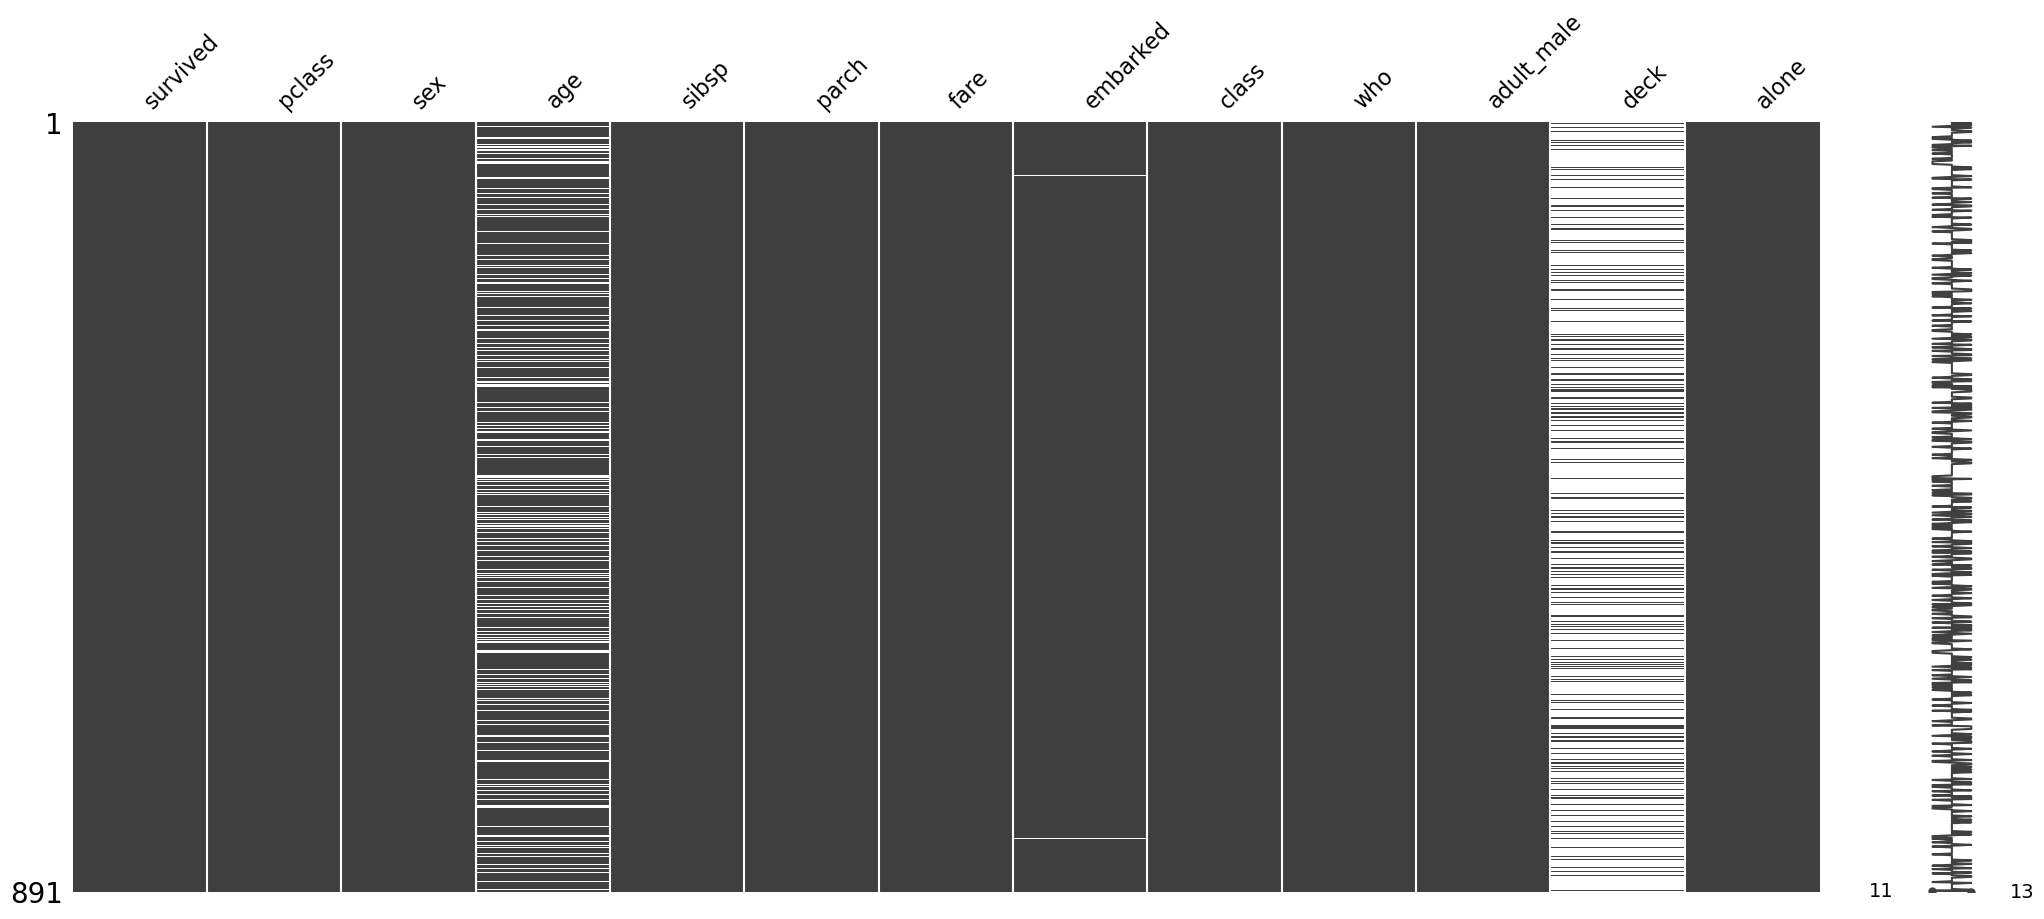

In [153]:
msno.matrix(df)

## deck

> first let's drop deck, because there so many missing values

In [154]:
df.drop(columns='deck', inplace=True)

## Age

In [155]:
df.corr()[['age']].style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_54/3666840792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['age']].style.background_gradient(cmap='coolwarm')


,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alone,0.198270


> adult_male and age have a good correlation, so we can use adult_male as an age predictoin

In [157]:
df.groupby(['adult_male', 'sex']).age.mean()

adult_male  sex
False       0      27.915709
            1       5.466750
True        1      33.173123
Name: age, dtype: float64

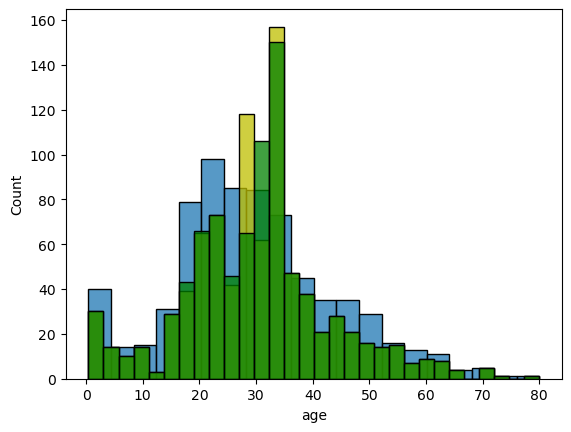

In [158]:
df['age_1'] = df['age'].fillna(df.groupby(['adult_male', 'sex'])['age'].transform('mean'))
df['age_2'] = df['age'].fillna(df.groupby(['adult_male', 'sex', 'sibsp', 'alone'])['age'].transform('mean'))
ax = sns.histplot(df.age)
ax = sns.histplot(df.age_1, ax=ax, color='y', label='age_1')
ax = sns.histplot(df.age_2, ax=ax, color='g', label='age_2')